In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import json

RATIO = 0.7
MIN_SIZE = 1000

In [2]:
with open("stats/geo_continent_data.json", "r", encoding="utf8") as file_in:
    geo_all_dict = json.load(file_in)
geo_dict = dict()
continent_count = {
    "NA": 0,
    "SA": 0,
    "EU": 0,
    "AF": 0,
    "AS": 0,
    "OC": 0,
    "AN": 0,
    "MANY": 0
}
for as_num, data in geo_all_dict.items():
    # if data["tot_nodes_count"] < MIN_SIZE:
    #     pass
    if data["NA_nodes_count"] >= RATIO * data["tot_nodes_count"]:
        geo_dict[as_num] = "NA"
        continent_count["NA"] += 1
    elif data["SA_nodes_count"] >= RATIO * data["tot_nodes_count"]:
        geo_dict[as_num] = "SA"
        continent_count["SA"] += 1
    elif data["EU_nodes_count"] >= RATIO * data["tot_nodes_count"]:
        geo_dict[as_num] = "EU"
        continent_count["EU"] += 1
    elif data["AF_nodes_count"] >= RATIO * data["tot_nodes_count"]:
        geo_dict[as_num] = "AF"
        continent_count["AF"] += 1
    elif data["AS_nodes_count"] >= RATIO * data["tot_nodes_count"]:
        geo_dict[as_num] = "AS"
        continent_count["AS"] += 1
    elif data["OC_nodes_count"] >= RATIO * data["tot_nodes_count"]:
        geo_dict[as_num] = "OC"
        continent_count["OC"] += 1
    elif data["AN_nodes_count"] >= RATIO * data["tot_nodes_count"]:
        geo_dict[as_num] = "AN"
        continent_count["AN"] += 1
    else:
        continent_count["MANY"] += 1


In [ ]:
continent_count

In [3]:
analysis_df = pd.read_csv("analysis_2020_08/analysis.tsv", delimiter="\t", index_col=0).dropna(how="all", subset=["avg_coreness", "graph_coreness", "core_order", "density_lcc", "assortativity_lcc", "transitivity_lcc", "avg_shortest_path_len", "approx_avg_shortest_path_len"]).drop(columns=["ri_pp_ifs_dis", "ri_tot_neighs_dis", "dis_leaf1_aggr_type", "dis_leaf_aggr_leaf1_num", "re_pp_ifs_dis", "re_tot_neighs_dis"])
#[["core_order","density_lcc"]].dropna()
analysis_df

,ds_nodes,ds_links,largest_cc_size,largest_cc_coverage,as_routers,non_as_routers,leaf1,leaf2,default,border,...,re_tot_tot_neighs,avg_coreness,graph_coreness,core_order,density_lcc,assortativity_lcc,transitivity_lcc,avg_shortest_path_len,approx_avg_shortest_path_len,time_to_analyze
as_number,,,,,,,,,,,,,,,,,,,,,
42248,1000,1264,1036,0.994242,1000,42,957,5,4,34,...,124,1.162162,7.0,10.0,0.002175,-0.789422,0.017278,NaN,3.724659,7.668886
6663,1002,16492,4987,0.984989,1002,4061,762,49,31,160,...,9603,2.246240,14.0,38.0,0.000887,-0.479925,0.022093,NaN,3.244771,227.866007
13591,1002,2982,2264,0.958510,1002,1360,700,92,66,144,...,1883,1.258392,5.0,12.0,0.001085,-0.426800,0.008879,NaN,4.488884,37.121452
50542,1003,1362,1321,0.992487,1003,328,702,3,3,295,...,626,1.041635,2.0,55.0,0.001553,-0.560850,0.000115,NaN,3.048465,12.558716
4663,1006,2131,1555,0.962252,1006,610,661,15,20,310,...,960,1.221865,10.0,11.0,0.001522,-0.305545,0.027635,NaN,4.050626,16.616252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,581362,754669,616334,0.988900,581362,41890,559485,2733,883,18261,...,107585,1.111151,21.0,28.0,0.000004,-0.508758,0.000784,NaN,3.978321,39894.204188
5089,586305,930335,900741,0.989618,586305,323886,262811,5857,894,316743,...,648144,1.044029,6.0,7.0,0.000002,-0.219191,0.000014,NaN,5.125428,67688.657558
209,674414,1309172,825689,0.988111,674414,161210,534501,12243,2379,125291,...,639783,1.478631,48.0,70.0,0.000004,-0.319592,0.003252,NaN,5.216719,73153.831827


In [4]:
# geo_dict
small_df = analysis_df.iloc[:5]

In [5]:
# per-continent stats
continents = dict()
for continent, count in continent_count.items():
    continent_dict = dict()
    for column in analysis_df.columns:
        continent_dict[column] = 0
    continent_dict["count"] = 0
    continents[continent] = continent_dict
for index, row in analysis_df.iterrows():
    as_number = str(index)
    if as_number not in geo_dict:
        continue
    continent = geo_dict[as_number]
    for column in analysis_df.columns:
        continents[continent][column] = continents[continent][column] + row[column]
    continents[continent]["count"] = continents[continent]["count"] + 1
# average
for continent, row in continents.items():
    for column, data in row.items():
        if row["count"] != 0 and column != "count":
            continents[continent][column] = data / row["count"]


        

continent_df = pd.DataFrame.from_dict(continents, orient="index").drop(["AN", "MANY"]).drop(columns=["avg_shortest_path_len"])
continent_df

,ds_nodes,ds_links,largest_cc_size,largest_cc_coverage,as_routers,non_as_routers,leaf1,leaf2,default,border,...,re_tot_tot_neighs,avg_coreness,graph_coreness,core_order,density_lcc,assortativity_lcc,transitivity_lcc,approx_avg_shortest_path_len,time_to_analyze,count
NA,30525.352941,111519.582043,45854.198142,0.979162,30525.352941,16265.619195,22884.176471,953.315789,181.281734,6506.578947,...,62605.764706,1.250685,8.953560,79.065015,0.000714,-0.481815,0.010406,4.460332,6913.526845,323
SA,11435.979167,32840.020833,19241.895833,0.969382,11435.979167,8472.916667,8868.666667,233.562500,90.104167,2243.645833,...,16628.437500,1.209991,9.333333,27.562500,0.000832,-0.500094,0.007826,4.027718,1406.812203,48
EU,16603.212598,46869.336614,21760.931102,0.979726,16603.212598,5614.381890,13045.681102,285.864173,113.336614,3158.330709,...,13655.106299,1.210833,8.064961,38.624016,0.000828,-0.500216,0.008642,4.121159,1636.456647,508
AF,9635.320000,28983.360000,14881.280000,0.978089,9635.320000,5769.840000,4155.000000,126.280000,48.480000,5305.560000,...,14883.800000,1.552561,21.640000,61.000000,0.000557,-0.474052,0.022839,3.962826,1685.452753,25
AS,21349.994536,83906.546448,39087.562842,0.972210,21349.994536,19562.267760,15819.043716,382.338798,171.344262,4977.267760,...,50038.120219,1.325962,11.863388,61.513661,0.000657,-0.429740,0.012623,4.366946,4148.271773,183
OC,13672.681818,44637.545455,39964.590909,0.980262,13672.681818,26588.909091,10363.454545,268.227273,61.590909,2979.409091,...,31303.045455,1.216005,8.227273,20.500000,0.000664,-0.505765,0.006044,3.998191,26855.087486,22


In [6]:
# geo_df = pd.DataFrame.from_dict(geo_dict, orient="index", columns=["continent"])
geo_df = pd.DataFrame(geo_dict.items(), columns=["as_number", "continent"]).astype({"as_number": int}).set_index("as_number")
geo_df

,continent
as_number,
11814,NA
31655,EU
9381,AS
13489,SA
36149,NA
...,...
140671,AS
135127,OC
135972,AS


In [7]:
df = analysis_df.join(geo_df)

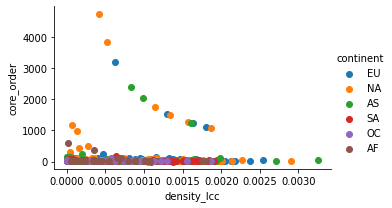

In [8]:
fg = seaborn.FacetGrid(data=df, hue='continent', aspect=1.61)
fg.map(plt.scatter, 'density_lcc', 'core_order').add_legend()

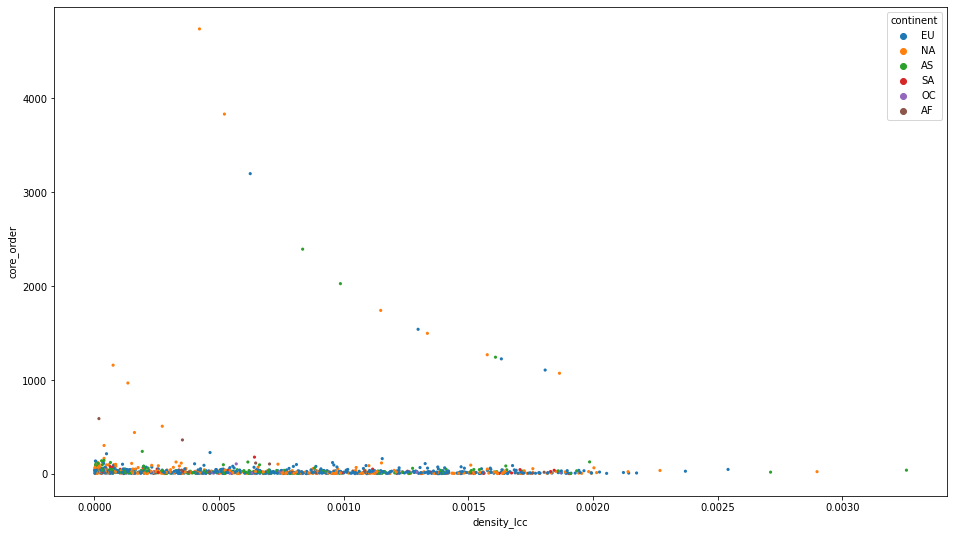

In [10]:
fig, ax = plt.subplots(figsize=(16,9))
sns_plot = seaborn.scatterplot(data=df, x="density_lcc", y="core_order", hue='continent', s=10, linewidth=0, ax=ax)

In [14]:
fig = sns_plot.get_figure()
fig.savefig("scatter_geo_density_vs_core.png")
